In [1]:
import numpy
import tensorflow as tf
import pandas
pandas.set_option('display.precision',10)
from tensorflow.keras import layers
##from tf.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# load dataset
df = pandas.read_csv("datasets - Combined.csv")
df.head()

,game,ranking_idol,event_type,year,month,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,SIF,minami_kotori,token,2013,5,14,24781,15000,10000,0,0,0
1,SIF,sonoda_umi,token,2013,5,14,30655,15000,10000,0,0,0
2,SIF,yazawa_nico,token,2013,6,13,47472,31330,10000,0,0,0
3,SIF,minami_kotori,token,2013,6,9,26333,16246,10000,0,0,0
4,SIF,sonoda_umi,token,2013,7,7,26846,16800,10000,0,0,0


In [3]:
#One hot encoding
#Encode game
game = df['game']
game_dummy = pandas.get_dummies(game,prefix='game')
game_dummy.head()

,game_SIF,game_mltd
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [4]:
#Encode Idols
idol = df['ranking_idol']
idol_dummy = pandas.get_dummies(idol,prefix='idol')
idol_dummy.head()

,idol_arisa matsuda,idol_ayase_eli,idol_ayumi maihama,idol_emily stewart,idol_fukuda noriko,idol_hakozaki serika,idol_handa roco,idol_hibiki ganaha,idol_hoshii miki,idol_hoshizora_rin,...,idol_tanaka kotoha,idol_tenkubashi tomoka,idol_tokoro megumi,idol_tokugawa matsuri,idol_toujou_nozomi,idol_tsushima_yoshiko,idol_watanabe_you,idol_yayoi takatsuki,idol_yazawa_nico,idol_yuriko nanao
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Encode Event Types
event_type = df['event_type']
event_type_dummy = pandas.get_dummies(event_type,prefix='event_type')
event_type_dummy.head()

,event_type_challenge_festival,event_type_friendly_match,event_type_medley_festival,event_type_score_match,event_type_theater,event_type_token,event_type_tour,event_type_touring_rally
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [6]:
#Drop Data
df.drop(['game'],axis=1,inplace=True)
df.drop(['ranking_idol'],axis=1,inplace=True)
df.drop(['event_type'],axis=1,inplace=True)
df.head()

,year,month,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,2013,5,14,24781,15000,10000,0,0,0
1,2013,5,14,30655,15000,10000,0,0,0
2,2013,6,13,47472,31330,10000,0,0,0
3,2013,6,9,26333,16246,10000,0,0,0
4,2013,7,7,26846,16800,10000,0,0,0


In [7]:
#Concat Data
df = pandas.concat([game_dummy,idol_dummy,event_type_dummy,df],axis=1)
df.head()

,game_SIF,game_mltd,idol_arisa matsuda,idol_ayase_eli,idol_ayumi maihama,idol_emily stewart,idol_fukuda noriko,idol_hakozaki serika,idol_handa roco,idol_hibiki ganaha,...,event_type_touring_rally,year,month,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,1,0,0,0,0,0,0,0,0,0,...,0,2013,5,14,24781,15000,10000,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,2013,5,14,30655,15000,10000,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,2013,6,13,47472,31330,10000,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,2013,6,9,26333,16246,10000,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,2013,7,7,26846,16800,10000,0,0,0


In [8]:
df.shape

(180, 73)

In [9]:
#Zscoring
df['t1_zscore'] = (df['t1_cutoff'] - df['t1_cutoff'].mean())/df['t1_cutoff'].std()   
df.head()
df.shape

(180, 74)

In [13]:
#Split data
# split into input (X) and output (Y) variables
dataset = df.values
X = dataset[:,0:67]
Y = dataset[:,73]

[-1.09103473e+00 -1.03054620e+00 -8.57370221e-01 -1.07505274e+00
 -1.06977003e+00 -8.87223176e-01 -9.29052326e-01 -9.21123117e-01
 -9.63539234e-01 -9.79603605e-01 -2.68631632e-01 -9.07530188e-01
 -1.75592152e-01 -9.73425001e-01 -2.95055463e-01 -8.75545615e-01
 -2.34350677e-01 -8.98694785e-01 -2.32136678e-01 -9.29423042e-01
 -2.25937478e-01 -8.06551202e-01 -4.30191832e-01 -9.55218714e-01
 -3.00801564e-01 -9.19259238e-01 -3.93830747e-01 -9.36343079e-01
 -4.17741944e-01 -8.62179234e-01 -3.17627963e-01 -8.85050367e-01
 -4.42888863e-01 -9.65845913e-01 -4.30953860e-01 -9.21730680e-01
 -4.21727144e-01 -9.64908825e-01 -1.16359935e-01 -8.97304599e-01
 -3.21942688e-01 -2.03292894e-01 -9.73394108e-01 -4.24981209e-01
 -1.95672616e-01 -9.66793299e-01 -4.09143387e-01 -1.92181704e-01
 -9.34056995e-01 -4.27504139e-01 -1.59548377e-01 -1.00054907e+00
 -3.35484129e-01 -1.77641389e-01 -8.87521809e-01 -2.25525571e-01
 -2.07151432e-02 -9.57824026e-01 -2.36430807e-01  3.47275308e-02
 -9.30514596e-01 -3.16083

In [14]:
#Predict
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [24]:
#fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=final_model(), epochs=100, batch_size=5, verbose=0)

In [35]:
def final_model():
    # create model
    model = Sequential()
    model.add(Dense(134, input_dim=67, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss='mean_absolute_error', optimizer='rmsprop')
    model.fit(X, Y, epochs=2000,batch_size=10,verbose=0)
    
    return model

In [36]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=final_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Final: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Final: -0.31 (0.23) MAE


In [37]:
ynew = final_model().predict(X)
indexes = [0]*len(X)
for i in range(len(X)):
    print("Actual=%s, Predicted=%s" % (Y[i], ynew[i]))
    indexes[i] = i

Actual=-1.0910347298772314, Predicted=[-0.8425231]
Actual=-1.0305461958288311, Predicted=[-0.901704]
Actual=-0.8573702208387142, Predicted=[-0.869615]
Actual=-1.0750527406291692, Predicted=[-0.8860907]
Actual=-1.0697700341315817, Predicted=[-0.9619915]
Actual=-0.8872231762705004, Predicted=[-0.92807406]
Actual=-0.9290523259648487, Predicted=[-0.91185683]
Actual=-0.921123117381725, Predicted=[-0.93691003]
Actual=-0.9635392344646941, Predicted=[-0.9201589]
Actual=-0.9796036051006329, Predicted=[-0.9173634]
Actual=-0.26863163237852683, Predicted=[-0.3013274]
Actual=-0.9075301883820845, Predicted=[-0.9005497]
Actual=-0.17559215244538137, Predicted=[-0.17563234]
Actual=-0.9734250010098873, Predicted=[-0.9412572]
Actual=-0.2950554625399492, Predicted=[-0.37297335]
Actual=-0.875545614538991, Predicted=[-0.9202997]
Actual=-0.23435067734837284, Predicted=[-0.3599913]
Actual=-0.8986947845323182, Predicted=[-0.9298999]
Actual=-0.23213667754918899, Predicted=[-0.40927684]
Actual=-0.929423042210293

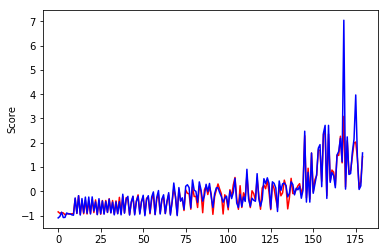

In [38]:
#Visualization
import matplotlib.pyplot as plt
plt.plot(indexes,ynew,color='red')
plt.plot(indexes,Y,color='blue')
plt.ylabel('Score')
plt.show()

In [39]:
#Visualize regularized
Y_reg = df['t1_cutoff']
indexes = [0]*len(X)
y_pred_normalized = [0]*len(X)
for i in range(len(X)):
    res = (ynew[i]*Y_reg.std())+Y_reg.mean()
    print("Actual=%s, Predicted=%s" % (Y_reg[i], res))
    indexes[i] = i
    y_pred_normalized[i] = res

Actual=24781, Predicted=[48913.797]
Actual=30655, Predicted=[43166.773]
Actual=47472, Predicted=[46282.914]
Actual=26333, Predicted=[44682.977]
Actual=26846, Predicted=[37312.297]
Actual=44573, Predicted=[40606.]
Actual=40511, Predicted=[42180.844]
Actual=41281, Predicted=[39747.945]
Actual=37162, Predicted=[41374.633]
Actual=35602, Predicted=[41646.1]
Actual=104644, Predicted=[101468.94]
Actual=42601, Predicted=[43278.867]
Actual=113679, Predicted=[113675.09]
Actual=36202, Predicted=[39325.797]
Actual=102078, Predicted=[94511.445]
Actual=45707, Predicted=[41360.96]
Actual=107973, Predicted=[95772.125]
Actual=43459, Predicted=[40428.695]
Actual=108188, Predicted=[90986.04]
Actual=40475, Predicted=[42787.344]
Actual=108790, Predicted=[97366.37]
Actual=52407, Predicted=[46047.57]
Actual=88955, Predicted=[96670.73]
Actual=37970, Predicted=[38390.89]
Actual=101520, Predicted=[92991.3]
Actual=41462, Predicted=[39477.906]
Actual=92486, Predicted=[94174.516]
Actual=39803, Predicted=[41921.797

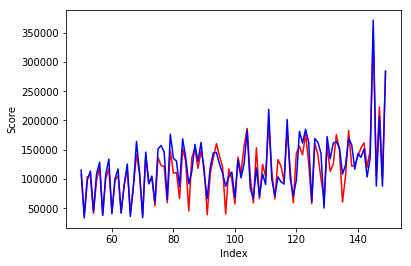

In [40]:
#Visualization
import matplotlib.pyplot as plt
plt.plot(indexes[50:150], y_pred_normalized[50:150],color='red')
plt.plot(indexes[50:150],Y_reg[50:150],color='blue')
plt.ylabel('Score')
plt.xlabel('Index')
plt.show()